<a href="https://colab.research.google.com/github/PraveenUppar/Machine-Learning/blob/main/Toy%20Project/Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps
#### 0. Preprocess + EDA + Feature Selection
#### 1. Extract input and output cols
#### 2. Scale the values
#### 3. Train test split
#### 4. Train the model
#### 5. Evaluate the model/model selection
#### 6. Deploy the model --> Heroku , AWS

In [35]:
# Import the dependices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import the dataset
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
# Check the number of columns and rows
df.shape

(100, 4)

In [7]:
# To check missing or null data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [8]:
# Remove the unwanted sections
df =df.iloc[:,1:]

In [10]:
# Check the modified dataset
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


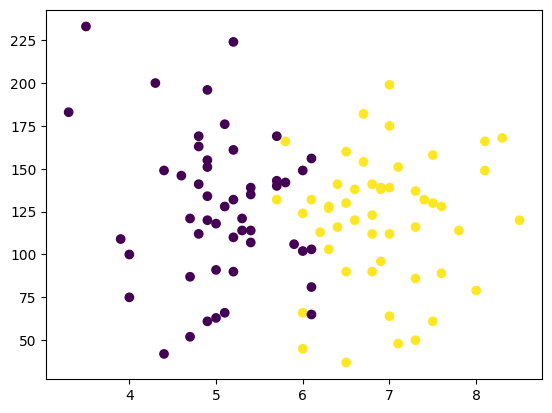

In [45]:
# Plot the graph of the preprocesssed data
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
# Independent Variables
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [24]:
X.shape

(100, 2)

In [22]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [17]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [26]:
y_test

,placement
90,1
45,1
94,0
70,1
14,0
88,0
39,0
33,0
46,0
43,1


In [19]:
y_train

,placement
57,1
28,0
87,1
99,1
7,0
...,...
44,1
41,0
5,1
76,0


In [27]:
X_train

,cgpa,iq
57,6.5,130.0
28,5.2,90.0
87,5.7,132.0
99,6.2,113.0
7,5.0,63.0
...,...,...
44,7.5,61.0
41,5.4,114.0
5,7.1,48.0
76,4.9,155.0


In [20]:
X_test

,cgpa,iq
90,7.3,86.0
45,6.0,66.0
94,4.7,52.0
70,6.3,127.0
14,6.1,103.0
88,4.4,149.0
39,4.6,146.0
33,6.0,149.0
46,5.3,114.0
43,6.8,141.0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
# Transform data from 0 to 1
X_train = scaler.fit_transform(X_train)

In [29]:
X_train

array([[ 0.41704096,  0.13132392],
       [-0.70723997, -0.86397316],
       [-0.27482423,  0.18108877],
       [ 0.15759151, -0.29167734],
       [-0.88020626, -1.53579869],
       [-0.01537478, -0.01797064],
       [-0.96668941,  0.65385489],
       [-0.70723997,  2.47027206],
       [ 0.8494567 , -0.31655977],
       [ 0.41704096, -2.18274179],
       [ 1.36835558, -0.88885559],
       [-0.27482423,  0.45479547],
       [ 0.8494567 ,  1.25103314],
       [ 1.97373762,  1.07685615],
       [ 0.50352411, -0.11750035],
       [ 1.28187244,  0.13132392],
       [ 0.59000725,  1.42521013],
       [-0.62075682, -0.09261792],
       [-1.1396557 , -0.09261792],
       [ 0.07110837,  0.77826702],
       [-0.01537478, -0.56538404],
       [ 1.80077132,  0.60409003],
       [-1.74503774, -0.61514889],
       [ 0.8494567 ,  0.35526576],
       [-0.79372311,  1.27591556],
       [-2.35041978,  1.45009255],
       [-0.53427367,  0.35526576],
       [ 1.36835558,  0.08155907],
       [ 1.80077132,

In [46]:
# Transform data from 0 to 1
X_test = scaler.transform(X_test)

In [31]:
X_test

array([[ 1.10890614, -0.96350287],
       [-0.01537478, -1.46115141],
       [-1.1396557 , -1.80950539],
       [ 0.24407466,  0.05667664],
       [ 0.07110837, -0.54050161],
       [-1.39910515,  0.60409003],
       [-1.22613885,  0.52944275],
       [-0.01537478,  0.60409003],
       [-0.62075682, -0.26679491],
       [ 0.6764904 ,  0.40503062]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [36]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_test

,placement
90,1
45,1
94,0
70,1
14,0
88,0
39,0
33,0
46,0
43,1


In [44]:
# Import the accuaracy score from sklearn
from sklearn.metrics import accuracy_score

In [40]:
# Compare the input data with ouput data
accuracy_score(y_test,y_pred)

0.8

In [42]:
# To visualize How ML worked on it
from mlxtend.plotting import plot_decision_regions

<Axes: >

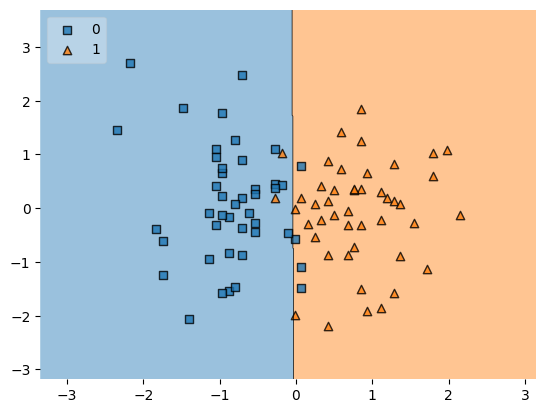

In [43]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [47]:
# Convert object to file
import pickle

In [48]:
pickle.dump(clf,open('toy_project_model.pkl','wb'))